# Занятие ??. gRPC

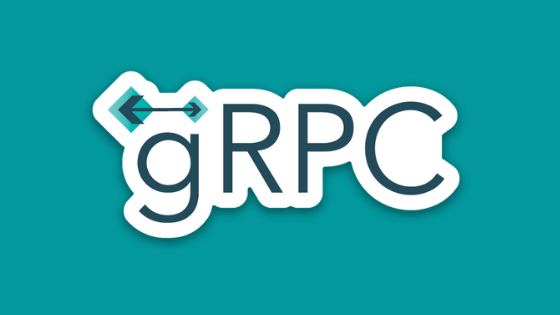

## RPC
Прежде чем начать осваивать gRPC, Нужно понять, что такое RPC и с чем его едят.

**Идея вызова удалённых процедур** (remote procedure call, RPC) - расширение механизма передачи управления и данных внутри программы, выполняющейся на одном узле, на передачу управления и данных через сеть. 

Средства RPC:
- облегчение организации распределённых вычислений
- создания распределенных клиент-серверных информационных систем

**TL;DR** Клиент исполняет какой-то код, хранящийся на сервере и получает ответ, как будто он его исполнял локально.

RPC наиболее эффективен в приложениях, в которых существует интерактивная связь между удалёнными компонентами с небольшим временем ответов и относительно малым количеством передаваемых данных. Такие приложения называются RPC-ориентированными.

### Как происходит работа?

1. Клиент отправляет запрос, который обрабатывается заглушкой (классами, которые были сгенерированы из `.proto` файла)
2. Заглушка обрабатывает запрос и отправляет его в сеть
3. Сервер от сети получает этот запрос, его так же обрабатывает заглушка и затем передает самому серверу
4. На сервере запускается код, получив результат, сервер отправляет его клиенту по тому же маршруту

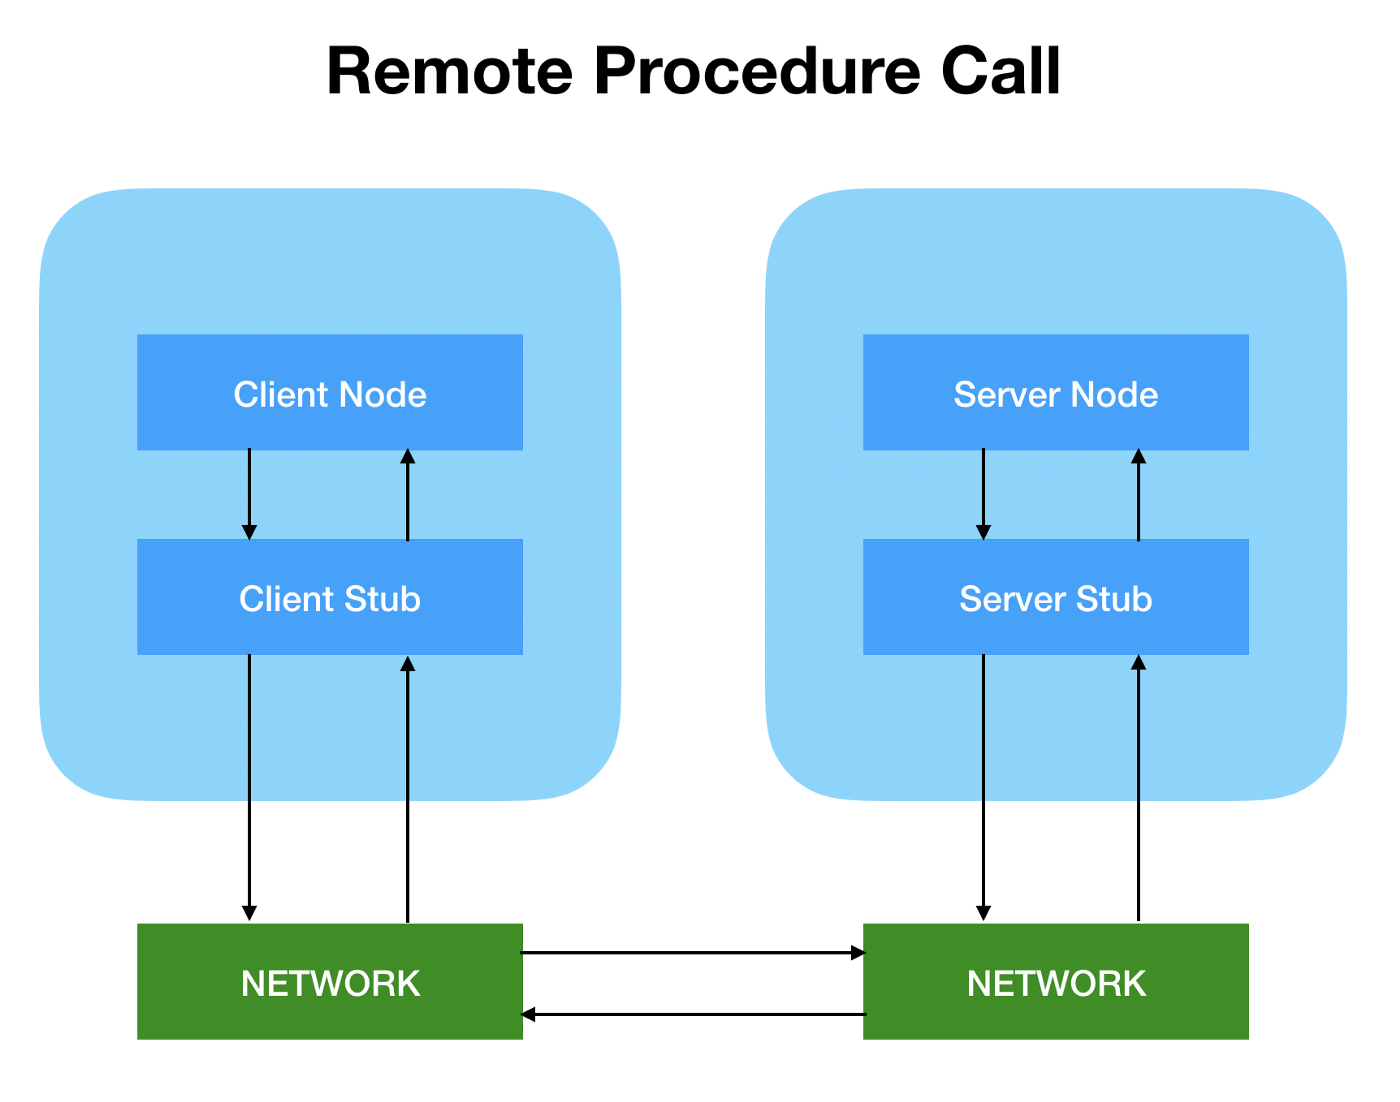

## gRPC

Фреймворк **gRPC** - новая и, пожалуй, наиболее действенная и перспективная реализация этой концепции. 

Преимущества по сравнению с другими реализациями RPC:

* **Идиоматические клиентские библиотеки на многих языках.** Можем использовать библиотеки на Java, C#, JavaScript, Python и т.д. Мы просто пишем код на языке **protobuf** и он сгенерирует нам весь код для определенного языка программирования, будь то Python, Java или Go

* **Простая структура определения сервисов**. Используются .proto-файлы

* **HTTP/2.** Двунаправленная потоковая передача на основе HTTP/2

* **Трассировка.** Позволяет мониторить вызовы процедур - очень полезно для отладки приложения и анализа работы сервисов

* **Health check.** Можно быстро проверить, работоспособен ли сервис и готов ли он обрабатывать запросы - помогает для балансировки нагрузки

* **Балансировка нагрузки.** Позволяет распределять нагрузку на несколько экземпляров серверного приложения, упрощая вопрос масштабирования. Балансировка может производиться как на клиентской части (например, клиентское приложение поочередно отправляет запросы на разные серверы), так и на промежуточной (специальной прокси) посредством сервис-меша.

* **Подключение аутентификации.** Ее отсутствие было главным недостатком прошлых реализаций протокола. Из-за такой уязвимости RPC рекомендовали только для внутреннего общения.

## gRPC vs остальные

**gRPC** - это один из фреймфорков для передачи пакетов по сети. Вам уже знаком **REST**, также есть **GraphQL** и некоторые другие. 

Поскольку мы проходили REST, рассмотрим его отличия от gRPC.

### REST vs gRPC

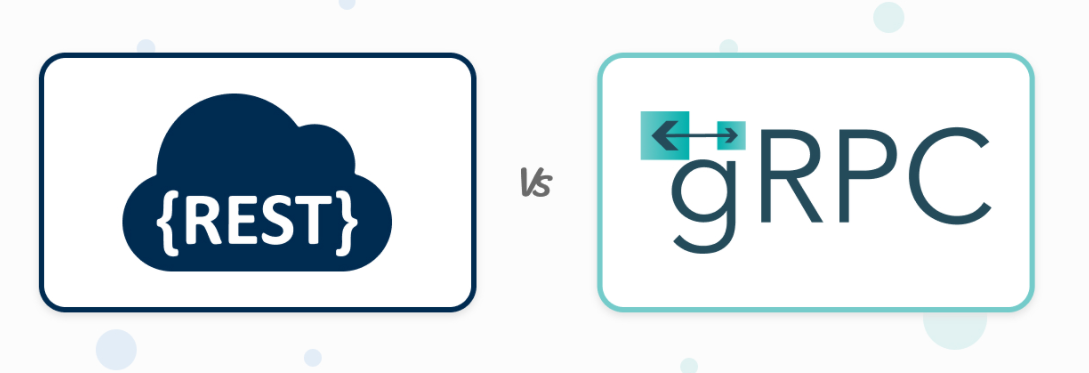

Чтобы лучше понять принципиальную разницу между этими фреймворками, рассмотрим, как они устроены.

Для работы REST посредством самого обычного CRUD подхода обычно используется пять типов HTTP-запросов для данных какого-то ресурса:

* **GET**: получение/чтение;
* **POST**: добавление/запись;
* **PUT/PATCH**: обновление/изменение;
* **DELETE**: удаление.

**Модель сетевого взаимодействия:**

Клиент и сервер объединены общей сетью, в нужный момент клиент отправляет HTTP-запрос, сервер обрабатывает его и возвращает HTTP-ответ. Пока сервер делает свое дело, клиент выделяет дополнительный поток, в котором и происходит ожидание.

Если поменять HTTP-запросы на RPC-коллы (вызовы удаленных процедур), то мы получаем схожую схему. **Разница** - в отправке и получении сервером запроса и получение ответа клиентом.

В **RPC** не нужно досконально разбираться в сети. У клиента и сервера есть дополнительный уровень в общении — клиентская и серверная заглушки. Они созданы для того, чтобы отправлять данные по нужному адресу. Эти заглушки генерируются автоматически, в самом коде мы об этом вообще не переживаем. Все, что нам остается сделать — вызвать нужную процедуру.


**Преимущества gRPC в сравнении с REST:**

* **Работа с Protobuf.** В REST для передачи данных применяется текстовый формат JSON, который не сжимается (самим REST, ведь HTTP/1 сжатие поддерживает). В gRPC используется Protobuf — бинарный формат, с помощью которого мы избегаем передачи лишних данных и нам не надо будет десериализовать после этого полученные сообщения.
* **Обработка HTTP-запросов.** В случае с REST необходимо постоянно думать, какой статус-код может прийти, какие данные будут храниться и т.п. В gRPC мы прикладываем минимум усилий для вызова удаленных процедур и их определения.
* **Простота определения контрактов.** В REST для описания интерфейсов и документации нужно использовать сторонние инструменты и библиотеки — такие, как OpenAPI или Swagger. В gRPC происходит простое определение контрактов в .proto-файлах.
* **HTTP/2.** REST зачастую использует более старую версию данного протокола — HTTP/1.1.

**Чем HTTP/2 лучше, чем HTTP/1.1?**

* **Бинарный формат передачи данных.** Уменьшает размер сообщений и ускоряет работу
* **Экономия трафика.** Усовершенствованное сжатие HTTP-сообщений, в первую очередь хедеров
* **Возможность передавать потоки данных**
* **Мультиплексирование** В HTTP 1.1 для передачи трех файлов надо установить три соединения, в каждом из которых будет запрашиваться и отправляться определенный файл, в HTTP/2 можно все передать по одному соединению
* **Приоритезация потоков.**

### Микросервисы vs Монолит

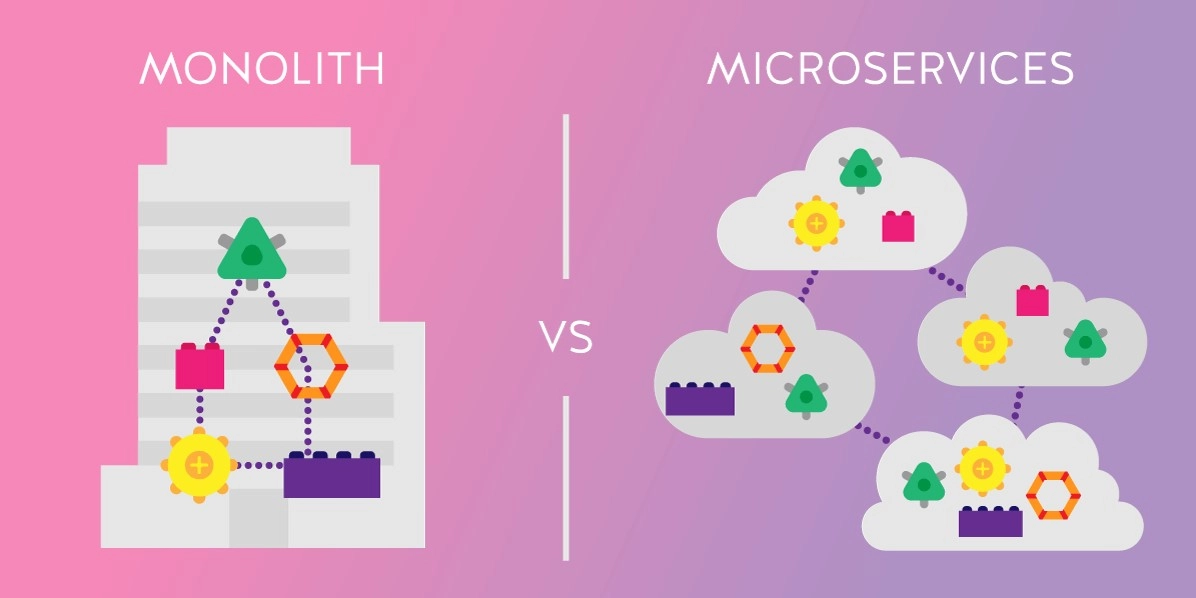

Чаще всего **gRPC** используется в написании микросервисов, а точнее - для их общения друг с другом.

* Что такое микросервисы и мотолит? 
* Чем они отличаются? 
* Что лучше?

### Монолит

Давайте рассмотрим пример - классический интернет-магазин. Он будет содержать стандартные модули:
- UI
- бизнес-логика
- дата-слой

Взаимодействовать с таким сервисом можно с помощью REST API и веб-интерфейса.

При архитектуре "Монолит" все эти вещи будут управляться внутри одного и того же модуля. 

Вы уже знакомы с этой архитектурой - скорее всего все проекты, которые вы делали для учебы являются представителями монолитной архитектуры.

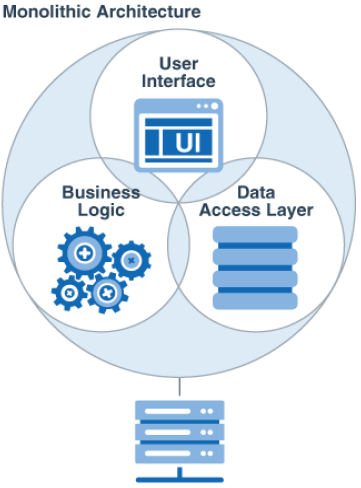

#### Достоинства

* **Легче реализовать.** Можете быстро начать реализовывать свою бизнес-логику, а не тратить время на размышления о межпроцессном взаимодействие.

* **Прост в развертывании и легко масштабируется.** Развертывание - загрузить ваш модуль и запустить приложение. Масштабирование - разместить Loadbalancer перед несколькими экземплярами вашего приложения.

#### Недостатки

* **Большой шарик грязи.** Часто архитектурные правила нарушаются и со временем компоненты срастаются в неподдерживаемое месиво. Из-за того что компоненты растут вместе, их также необходимо менять вместе. Например, создание новой функции может означать прикосновение к 5 различным местам: 5 мест, в которых вам нужно написать тесты; 5 мест, которые могут иметь нежелательные побочные эффекты для существующих функций.
    
* **Тяжело масштабировать.** Монолит легко масштабировать, пока он не превратился большой шарик грязи. Масштабирование может быть проблематичным, когда только одной части системы требуются дополнительные ресурсы, ведь в монолитной архитектуре вы не можете масштабировать отдельные части вашей системы.

* **В монолите практически нет изоляции.** Ошибка в модуле может замедлить или разрушить все приложение.

* **Строительство протекает с помощью выбора основы.** Отключение или обновление вашего первоначального выбора может быть затруднительным, потому что это должно быть сделано сразу и для всех частей вашей системы.
    > Вы возможно сталкивались, или столкнетесь с эти на Технологиях программирования, когда в ваш проект будет сложно добавлять какие-то новые сущности и вы перепишете его с использованием других технологий

### Микросервисы

В микросервисной архитектуре слабо связанные сервисы взаимодействуют друг с другом для выполнения задач, относящихся к их бизнес-возможностям.

Микросервисы в значительной степени получили свое название из-за того, что сервисы здесь меньше, чем в монолитной среде. Тем не менее, микро — о бизнес-возможностях, а не о размере.

По сравнению с монолитом в микросервисах у вас есть несколько единиц развертывания. Каждый сервис развертывается самостоятельно.

Давайте вновь рассмотрим в качестве примера Интернет-магазин:
- UI
- бизнес-логика
- дата-слой

Здесь отличие от монолита состоит в том, что у всех вышеперечисленных есть свой сервис и своя база данных. Они слабо связаны и могут взаимодействовать с различными протоколами (REST, gRPC, обмен сообщениями) через свои границы.

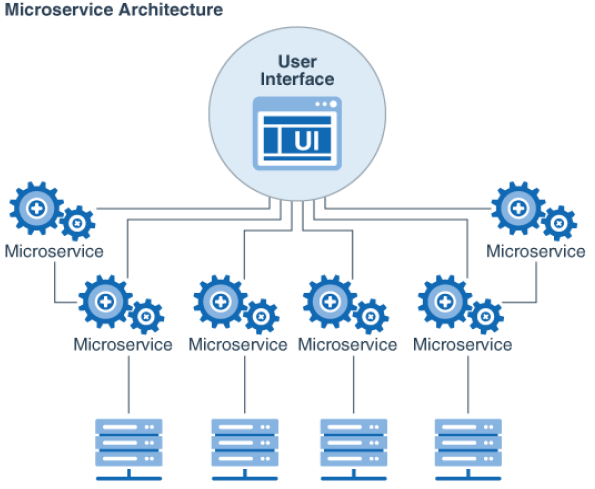

**Достоинства**

* **Легче держать модульными.** Обеспечивается жесткими границами между отдельными сервисами.

* **Разные сервисы могут принадлежать разным командам.** Позволяет командам работать над услугами самостоятельно. Нет необходимости координировать развертывание между командами. Развивать сервисы лучше с увеличением количества команд.

* **Легче понять и проверить.** Меньшие размеры снижают время компиляции, время запуска и время для тестирования - повышается производительность разработчика, т.к. меньше времени на ожидание.

* **Не привязаны к технологии, используемой в других сервисах.** Можем использовать разные наиболее подходящие технологии и даже разные языки для каждого микросервиса поотдельности - общение между ними происходит через общий API.

* **Более устойчивы.** Хорошо спроектированная распределенная система переживет сбой одного сервиса и это можно будет быстро починить.

**Недостатки**

* **Распределенная система имеет свою сложность.** Приходится иметь дело с частичным отказом, более затруднительным взаимодействием при тестировании (тесты E2E), а также с более высокой сложностью при реализации взаимодействия между сервисами.

* **Эксплуатационные накладные расходы.** Множество микросервисов сложнее в эксплуатации, чем несколько экземпляров монолита.

* **Нужно больше оборудования.** Иногда микросервисы могут превзойти один монолит, если есть его части, которые требуют масштабирования до предела.

* **Изменения в нескольких сервисах должны координироваться.** Это может быть сложно, если команды еще не имели контактов.

## Practice Time!

In [1]:
# Для начала нам нужно установить gRPC для нашей змейки:
# pip install grpcio grpcio-tools

## Protocol Buffers (protobuf)

**Protobuf** - формат сериализации, используемый по умолчанию для передачи данных между клиентом и сервером. Использует строгую типизацию полей и бинарный формат для передачи структурированных данных. Время выполнения процесса сериализации/десериализации и размер сообщений значительно меньше, чем в JSON/XML.

Для написания protobuf-файлов используют **язык описания интерфейсов (IDL)**. Чтобы описать структуру данных сообщения, нужно указать имя структуры, а внутри тип, название и номер поля. Номера полей очень важны для обратной совместимости, поэтому не стоит менять их последовательность при добавлении или удалении полей. Старые номера можно резервировать.

Подробнее можно почитать в [документации](https://developers.google.com/protocol-buffers).

Пример `profile.proto`:

```proto
message Profile {

  reserved 3; // Резервируем поле под номером 3
  int32 id = 1;
  string name = 2;
  int32 age = 4;
  string email = 5;
  enum PhoneType {
    MOBILE = 0;  // Поле 0 является значением по умолчанию
    HOME = 1;
    WORK = 2;
  }
  
  
  message PhoneNumber {
    string number = 1;
    PhoneType type = 2;
  }
  
  
  repeated PhoneNumber phones = 6;
}
```

### Типы RPC
* **Унарный (Unary RPC).** Синхронный запрос клиента, который блокируются пока не будет получен ответ от сервера.
* **Серверный стрим (Server streaming RPC).** При подключении клиента сервер открывает стрим и начинает отправлять сообщения.
* **Клиентский стрим (Client streaming RPC).** То же самое, что и серверный, только клиент начинает стримить сообщения на сервер.
* **Двунаправленный стрим (Bidirectional streaming).** Клиент инициализирует соединение, создаются два стрима. Сервер может отправить изначальные данные при подключении или отвечать на каждый запрос клиента по типу “пинг-понга”.

Давайте напишем простое приложение, которое будет принимать от клиента его имя и возраст, и возвращать время с точностью до микросекунды, в которое сервер получил запрос.

Создадим файл `time.proto` с таким содержанием:

```proto
syntax = "proto3";


// Входящий запрос от клиента
message greeting{
   optional string name = 1;
   optional uint32 age = 2;
}


// Ответ, возвращаемый API сервиса
message time{
   optional string daytime = 1;
}

// Определение сервиса
service TimeGetter {

   // Определение метода
   rpc get_time (greeting) returns (time) {};

}
```

Далее нам нужно сгенерировать исполняемый код при помощи gRPC
```
python -m grpc_tools.protoc -I. --python_out=. --grpc_python_out=. time.proto
```

**Можем приступать к написанию Сервера!**

Файл server.py:

In [ ]:
import grpc
from concurrent import futures  # нужен для создания сервера
import time_pb2 as pb2  # файл сгенерированный при помощи gRPC
import time_pb2_grpc as pb2_grpc
from datetime import datetime


class TimeGetter(pb2_grpc.TimeGetterServicer):  # Наследуемся от сгенерированного класса

    def get_time(self, request, context):
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S.%f")  # Получаем и конвертируем в строку время

        # Выводим сообщение о том, что запрос принят.
        print(f"Message from {request.name} received. He is {request.age} years old. Current time is {current_time}")
        return pb2.time(daytime=current_time)  # Возвращаем ответ


def serve():
    # Создаем сервер с обязательным аргументом обработчика потоков
    server = grpc.server(futures.ThreadPoolExecutor(max_workers=10))

    # Добавляем класс в качестве сервера, который будет обрабатывать ответы
    pb2_grpc.add_TimeGetterServicer_to_server(TimeGetter(), server)
    
    # Передаем порт, с которого будет приходить информация
    server.add_insecure_port("[::]:50051")
    
    server.start()
    server.wait_for_termination()


if __name__ == "__main__":
    print("running the gRPC server")
    serve()


**Время для клиента!**

Создаем файл client.py. В последствии его нужно будет запустить из другого окна терминала

In [ ]:
import grpc
import time_pb2 as pb2
import time_pb2_grpc as pb2_grpc


class Sender(object):
    def __init__(self):
        self.channel = grpc.insecure_channel("localhost:50051")
        self.stub = pb2_grpc.TimeGetterStub(self.channel)  # Инициализируем заглушку, которая будет обрабатывать забросы

    def get_time(self, name, age):
        request = pb2.greeting(name=name, age=age)  # Приводим запрос к форме, понятной gRPC
        response = self.stub.get_time(request)  # Собственно, сам запрос
        return response


if __name__ == "__main__":
    client = Sender()  # Объект клиента
    
    # Выполняем запросы
    print(client.get_time("Alex", 19))
    print(client.get_time("Vladislav", 18))
    print(client.get_time("Peter", 25))


### Поздравляю! Теперь вы немного умеете в gRPC!

Сейчас у вас сформировалось представление, что gRPC это очень крутая неведомая штука, которая все делает очень быстро и имеет много преимуществ перед REST. 

Но спешу вас расстроить, самый большой минус в gRPC это написание кода и его поддержка. REST помогает все делить на логические блоки, решать сложные задачи по-отдельности. В свою очередь, gRPC генерирует слишком много кода, чтобы уметь его поддерживать в достаточно сложных проектах. 

Именно поэтому его используют там, где очень важна именно скорость передачи данных. Часто в web-сервисах используется REST для общения с клиентами, а gRPC внутри, для передачи информации между микросервисами.